## 4️⃣ Spam Email Detection 📧🚫

- **Objective:** Classify SMS messages as spam or ham.  
- **Dataset:** SMS Spam Collection  
- **Skills & Techniques:**  
  - Text preprocessing: cleaning, tokenization, stopword removal  
  - Vectorization using TF-IDF & CountVectorizer  
  - Binary classification with Naive Bayes & Logistic Regression  
  - Building ML pipelines for preprocessing & modeling  
  - Cross-validation for robustness  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [6]:
## Read File 
df = pd.read_csv(r'D:\spam.csv',encoding='ISO-8859-1')[['v1','v2']]
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
df.columns = ['Labels','MSG']
### Data Cleaning 
print(df.isnull().sum())

Labels    0
MSG       0
dtype: int64


In [ ]:
## Lable Managing
df['Labels'] = df['Labels'].map({'ham':0,'spam':1})

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [14]:
### Text Cleaning 
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

df['Clean_MSG'] = df['MSG'].apply(clean_text)


In [16]:
### Vectorize 
Tfun = TfidfVectorizer(max_features=4000)
X = Tfun.fit_transform(df['Clean_MSG'])
y = df['Labels']

In [17]:
### Train-Test Split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [18]:
### Model Initilize 
model = LogisticRegression(max_iter=1000)
# Train 
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
### Testing Model
y_pre = model.predict(X_test)

In [20]:
#### Evaluation (classification_report, confusion_matrix)
cm = confusion_matrix(y_test,y_pre)
cfm = classification_report(y_test,y_pre)
a_s = accuracy_score(y_test,y_pre)
print('Accuracy Score : ',a_s)
print('Classification Report : ',cfm)
print('Confusion Matrix : ', cm)

Accuracy Score :  0.9548949256791389
Classification Report :                precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1685
        spam       0.96      0.70      0.81       266

    accuracy                           0.95      1951
   macro avg       0.96      0.85      0.89      1951
weighted avg       0.96      0.95      0.95      1951

Confusion Matrix :  [[1677    8]
 [  80  186]]


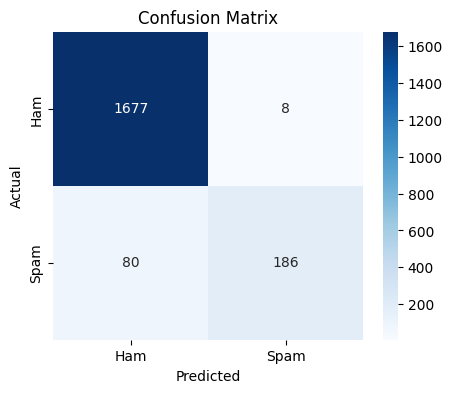

In [23]:
## Visualization of Confusion Matrix 
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()